# Data integration and exploring

In [1]:
import pandas as pd
import numpy as np

dayahead = pd.read_parquet('processed_data/dayahead.parquet')
helen = pd.read_parquet('processed_data/helen.parquet')
tuulivoima = pd.read_parquet('processed_data/tuulivoima.parquet')
weather = pd.read_parquet('processed_data/weather.parquet')

In [2]:
data = weather.join(helen).join(tuulivoima).join(dayahead)
data = data.drop(columns=['time','clouds', 'time zone', 'rain intensitety'])
data.head()

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price
datetime,,,,,,,,,,,,
2019-01-01 00:00:00,2019,1,1,1000.9,0.9,97.0,0.8,7.9,0,1063.619950,1427.0,10.07
2019-01-01 01:00:00,2019,1,1,998.7,2.2,97.0,1.5,8.5,1,1052.205482,1352.0,10.03
2019-01-01 02:00:00,2019,1,1,996.6,1.7,98.0,2.0,9.8,2,1014.848148,1177.0,4.56
2019-01-01 03:00:00,2019,1,1,994.2,0.3,98.0,2.4,8.9,3,1009.665530,1001.0,4.83
2019-01-01 04:00:00,2019,1,1,992.0,0.4,98.0,2.5,7.6,4,1028.339021,826.0,8.09


In [3]:
data.dtypes

year             int64
month            int64
day              int64
pressure       float64
rain           float64
humidity       float64
temperature    float64
wind           float64
hour             int64
dh_MWh         float64
Wind_MWh       float64
price          float64
dtype: object

# Weather and district heating

<AxesSubplot:title={'center':'Heating'}, xlabel='datetime'>

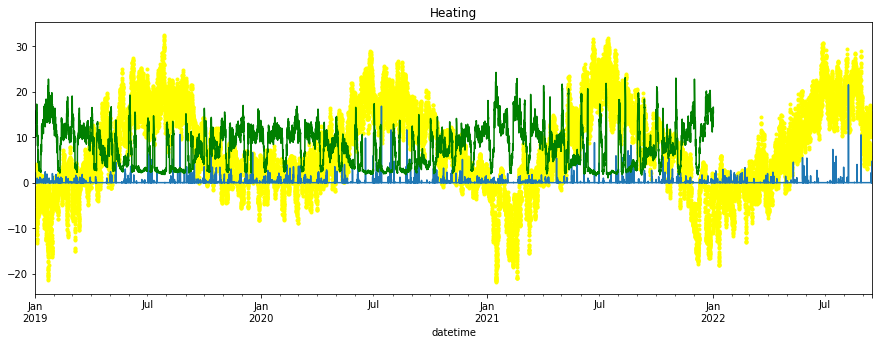

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

data.loc[:,'temperature'].plot(ax=ax, style='.', color='yellow', figsize=(15,5), title='Temperature')
data.loc[:,'rain'].plot(ax=ax, style='-', figsize=(15,5), title='Temperature')
data.loc[:,'dh_MWh'].apply(lambda p: p * 0.01).plot(ax=ax, style='-', color='green', figsize=(15,5), title='Heating')


# Short time look up - Wind power and electricity price

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

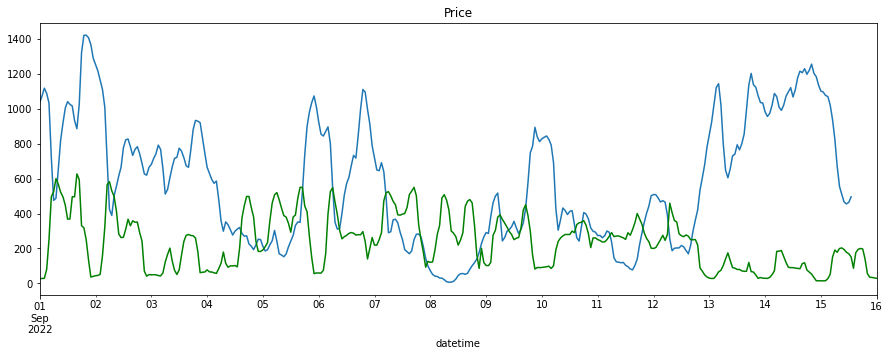

In [10]:
fig, ax = plt.subplots()

short_data = data['2022-09-01':]
#short_data.loc[:,'temperature'].plot(ax=ax, style='.', color='yellow', figsize=(15,5), title='Temperature')
#short_data.loc[:,'humidity'].apply(lambda w: w * 0.5 -30 ).plot(ax=ax, style='-', figsize=(15,5), title='Rain')
short_data.loc[:,'Wind_MWh'].apply(lambda w: w*0.5).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
#short_data.loc[:,'wind'].apply(lambda w: w*50).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
short_data.loc[:,'price'].plot(ax=ax, style='-', color='green', figsize=(15,5), title='Price')


# Short time look up - air temperature and electricity price

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

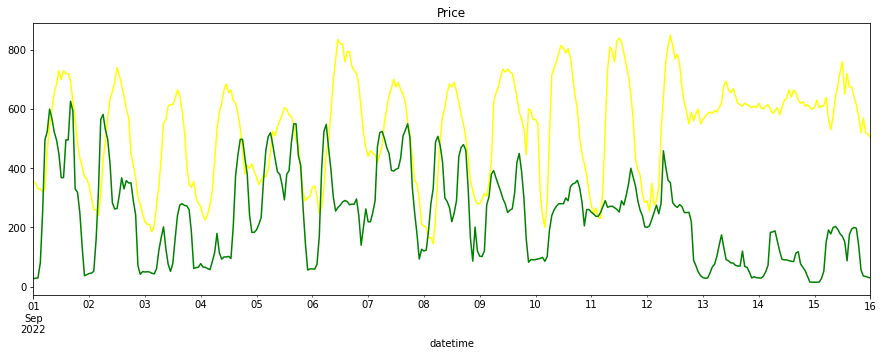

In [15]:
fig, ax = plt.subplots()


short_data = data['2022-09-01':]
short_data.loc[:,'temperature'].apply(lambda t: t*50).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
#short_data.loc[:,'humidity'].apply(lambda w: w * 0.5 -30 ).plot(ax=ax, style='-', figsize=(15,5), title='Rain')
#short_data.loc[:,'Wind_MWh'].apply(lambda w: w*0.5).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
#short_data.loc[:,'wind'].apply(lambda w: w*50).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
short_data.loc[:,'price'].plot(ax=ax, style='-', color='green', figsize=(15,5), title='Price')


# Long time look up - electricity price and temperature
Before war criris

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

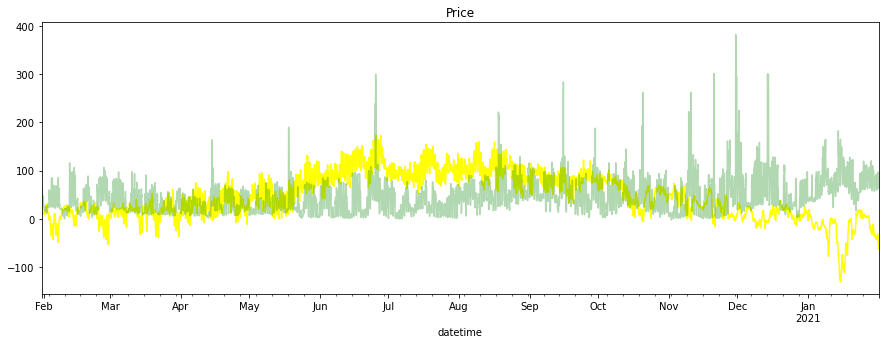

In [35]:
fig, ax = plt.subplots()


short_data = data['2020-01-31':'2021-01-31']

short_data.loc[:,'temperature'].apply(lambda t: t*6).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
short_data.loc[:,'price'].apply(lambda t: t*1.5).plot(ax=ax, style='-', alpha=0.3, color='green', figsize=(15,5), title='Price')

In [46]:
short_data.describe()

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price
count,1105.0,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1104.000000,1105.000000,0.0,1094.000000,1105.000000
mean,2022.0,8.326697,13.393665,1018.127421,0.066606,73.341176,16.527602,3.948007,11.489593,NaN,1240.315356,253.654190
std,0.0,0.469218,8.606418,7.163841,0.779491,14.965612,5.647260,1.559004,6.930826,NaN,815.918524,201.851733
min,2022.0,8.000000,1.000000,986.900000,0.000000,37.000000,2.900000,0.500000,0.000000,NaN,13.000000,0.050000
25%,2022.0,8.000000,6.000000,1016.000000,0.000000,62.000000,12.300000,2.900000,5.000000,NaN,572.000000,64.980000
50%,2022.0,8.000000,12.000000,1018.600000,0.000000,74.000000,16.600000,3.700000,11.000000,NaN,1075.500000,239.950000
75%,2022.0,9.000000,20.000000,1022.300000,0.000000,85.000000,21.100000,4.800000,17.000000,NaN,1893.750000,390.390000
max,2022.0,9.000000,31.000000,1030.700000,21.500000,100.000000,29.400000,9.600000,23.000000,NaN,3176.000000,861.140000
